# League of Legends - Worlds 2023 Swiss Style System Update. What does that mean for the West?

Since 2011, Riot Game have hosted yearly world championships inviting the best teams from many regions around the world. For the 2023 world championship, they have updated their groups stage from 4 groups of 4 teams (where after a double round robin within each group, the top two teams advance) to a Swiss style knockout stage. Here, each team races to achieve 3 set wins before 3 set losses, only fighting against teams with an equivalent scoreline at each step of the way. Since League has never seen such a system at the international level, it is natural to ask what impact this might have for Western teams, as we typically perform better in the volatile best of one double round robin stage of groups. We look to construct a stochastic simulate to investigate what outcomes one can expect from the new tournament system implemented and extrapolate to see what chances the West has at Worlds 2023. To begin with we will need to make some assumptions in order to achieve some kind of model, although first we will need to briefly cover the previous tournament setup.

A disclaimer before we start. The data isn't cleverly scraped, this project isn't perfect and the process not as detailed as it could be. Even-so, I am confident the method used provides a well-made stochastic simulation that meaningfully represents what could happen later this year at Worlds 2023 in October / November. I have done my utmost to outline my assumptions and justify my process below. 

# Overview
## Previous Tournament(s)

The previous structure was as follows. The regions of the world were split into rough two classifications, major and minor regions. Each region would send a number of their best teams as representatives to international tournmanents, where depending on the tournament in question there would be a different structure. Major regions (China, Korea, Europe and North America) typically have their best teams seeded further into international tournament, where as minor regions (Vietnam, South Asia, Oceania, Turkey, Japan, Brazil, Latin America and the Commonweath of Independent States), along with the lower seeds of major regions, must play through some play-in or enterence tournament. League of Legends has 4 primary international events in a year. Worlds (the main international event where a world champion is crowned), the Mid-Seasonal Invitational (A smaller tournament hosted between spring and summer for the winners of the winter/spring tournaments in each region), Asian Games and All-Stars. The All-Stars tournament is an off-season international tournament featuring fan-voted players, and was last seen in 2020, and as such will not be used in the data-set. In addition, the Asian Games include a mix of the best players from various Asian Regions, typically from accross multiple teams. While it is a very serious event with players fighting for national pride that commonly showcases some of the highest eschelons of competative play, both players and coaches lack the potentially years of experience working together, and do not represent the teams that would have had to fight through their regional league to be seeded into Worlds or MSI as a representative. Many smaller regions are included in the Asian Games tourament, such as Hong Kong, Malaysia, Singapore and Thailand. Thus, as there are differences in how these teams are constructed, we will also be excluding the Asian Games from our data-set, and thus will only be considering the Mid-Season Invitational and Worlds as valid observations.

The main issue we face is that as there are different numbers of represenatives from different regions sent to each tournament, observations between the strongest seeds (Korea/China 1st seeds) and the weakest seeds (minor regions who struggle to make it to the main stage) are extremely limited / completely unobserved. As such, our first assumption is that we will be measuring each Regions strength, rather than the seeds of each region (for example we will treat the 3rd seed of Europe the same as their 1st seed). This way, there is some observations of each region in competative play. Further, this helps transition observations between different region systems. Once upon a time, Latin America was split into North and South, and East Asia was split into different subsections. Here, we can simply group each collection of sub-regions into their eventual set.

## Blue-Team advantage and Side Selection

League of Legends has two different teams, Blue and Red, and while the map is mostly symettrical, just like chess, one-side has had a consistant advantage over history. Blue-side has long been considered the stronger team, and is chosen most often over the history of professional play. There have been certain times in leagues history where particular strategies for teams have left Red-side the more attractive option, but these are rare and specific to said teams. Typically the higher seed going into a match gets side selection in the first match (if the match is a best of 3 or 5), or teams will get to play once on both sides (in the double round robin mentioned above). The other way a team will have to choose a side is when they lose a match in a best of 3 or 5. I can't think of a fair way to represent this specific red-side quirk for specific regions in history without having to watch several hundreds of hours of matches, and currently in 2023 there seems to be a strong Blue-side preference over all 4 major regions. I can think of two different ways to tackle this. 
1) We could always have the team with side selection choose blue-side, which will have the better win-odds
2) We could work out some probability of a team choosing Red-Side, and some win-chance of the team IF red-side is chosen

Due to the aformented issues with limited observations between some regions, one can assume that option 2 will cause some issues, although it makes for an interesting extention to this project.

## Data and League History

As implyed above, League of Legends has had many different strategies and competitive structures over it's more than a decade as an international e-sport. What is considered the first Worlds tournement was won by Europe, although only 8 teams from North America, Europe and what was at the time South East Asia competed. Korea and China would enter for the Second season, although consistant level of dominance wasn't nearly as uniform as it would be in future seasons.  in 2016 the International Wild-Card Tournement would see its last showing before the formal Play-In tournement would become a part of the formal structure for Worlds. It is clear that some cut-off for the original seasons of League's history is required, as many of the instituations that now support teams in each region did not exist in the early years. I have chosen 2014 as the cut-off, so only data from season 5 (2015) and later will be considered. The precise cut-off does not have much justification, and there is an arguement for formal analysis to see if there is a significant difference in the win-rates of different teams around these years, however there is a lot of expert knowledge that would need to be provided to justify a specific cut-off date, and as a rough estimate of a date 2015 seems satisfactory.

Further, for the 2023 season, certain minor Regions were removed. Turkey was incorperated into Europe, forming EMEA (Europe, Middle-East and Africa), and Oceana was incorperated into the Pacific Champtionship (South-East Asia), although some of their players were absorbed by North America. As such, while we have data about these regions and how they performed, we won't be needing them for the simulation (although they are used in calcualting the average win-rate of each side).

On the topic of Regions, the Regions for League are commonly refered to in the acronym for the Championship the Region hosts. A rough guide of the current Regions primarily for non-league enjoyers follows:

Major Regions:
* Korea = LCK
* China = LPL
* Europe = LEC
* North America = LCS

Minor Regions:
* South-East Asia = PCS
* Vietnam = VCS
* Brazil = CBLOL
* Japan = LJL
* Latin America = LLA

where historicly active regions that are no-longer either:

* Oceania = OPL
* Turkey = TCL
* Commonweath of Independent States = CIS

The question is what to do with Oceania and Turkey? We can either re-classify their previous teams as they would appear in their new region, or we can remove them. Turkey is now a Teir two region inside the LEC and as such none of teir teams will be representing the LEC at Worlds. Further, while there was some chance of an Oceanian team to represent the PCS at Worlds, the best performing Oceanian team placed 7/8th, which implies the quality of Oceanian teams does not suitably represent the PCS, and as such both Regions should be excluded beyond calculating historic Blue-side advantage for our prior.

## Assumptions

* Regions have the same chance of winning regardless of the seed of the team (see above)
* The side of each team has a unique win-rate against each other region
* The team with side selection will choose their best side vs that region
* The Prior chosen for each distribution will be the Global win-rate for Blue/Red side before we observe any Region Specifics
* Matches between 2015-2023 will be used, and that data further back doesn't well represent the current state of League of Legends.

## Outline
The plan is as follows.
1) The first step is to collect the game record of every MSI and Worlds since 2015. Store how many games each region won and against whom.
2) Construct a prior distribution for the chance each side has to win before observing each Regions data. This will be average historical win-rates of each team.
3) Construct a Beta-Binomial distribution for the probability of each Region winning on blue-side against every other Region.
4) Simulate the new Swiss Structure at worlds, sampling from each probability distribution based on who is playing.
5) Repeat the simulation a substantual amount of times, observe how the West performs. How many times do we make it to the finals, etc.

# Libraries + Data

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import namedtuple
import seaborn as sns
data_matchtable_long = pd.read_csv("Match Results DataTable.csv")

## Data Wrangling because oopsies (Feel Free to Skip)

Load in data csv and pivot based on region. We need this to calculate observed win percentage for our posterior distribution. Let's first see how many games each Region has won vs each other Region on Blue and Red sides respectively. Let's load the data and test a quick pivot.

In [145]:
data_matchtable_long

,BLUE REGION,BLUE SEED,BLUE TEAM,BLUE SCORE,RED SCORE,RED TEAM,RED SEED,RED REGION
0,CH,CH,⁠Bilibili Gaming,0,1,JD Gaming,CH,CH
1,CH,CH,JD Gaming,1,0,⁠Bilibili Gaming,CH,CH
2,CH,CH,⁠Bilibili Gaming,1,0,JD Gaming,CH,CH
3,CH,CH,JD Gaming,1,0,⁠Bilibili Gaming,CH,CH
4,CH,CH,⁠Bilibili Gaming,1,0,T1,KR,KR
...,...,...,...,...,...,...,...,...
1194,VT,VT,Bangkok Titans,1,0,Chiefs Esports Club,OC,OC
1195,JP,JP,DetonatioN FocusMe,0,1,Besiktas E-Sports Club,TK,TK
1196,VT,VT,Bangkok Titans,0,3,Besiktas E-Sports Club,TK,TK
1197,CI,CI,Hard Random,1,3,INTZ eSports,BR,BR


There are a total of 1200 matchs, although some are single, some a best of 3 or 5, and some best of series are split into their individual games. Let's see how many games each side wins over-time. That will give us the total number of matches played (for every game Red wins, Blue loses and vica verse).

In [35]:
prior_blue_win_chance = data_matchtable_long['BLUE SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
prior_red_win_chance = data_matchtable_long['RED SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
print('Blue Wins: ' + str(data_matchtable_long['BLUE SCORE'].sum()) + ', Win % = ' + str(np.round(prior_blue_win_chance,4)))
print('Red Wins: ' + str(data_matchtable_long['RED SCORE'].sum()) + ', Win % = ' + str(np.round(prior_red_win_chance,4)))
print('Total Games Played: ' + str(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum()))

Blue Wins: 863, Win % = 0.5604
Red Wins: 677, Win % = 0.4396
Total Games Played: 1540


Excellent. This supports the belief ~~prior~~ historically held by the community that Blue-side is advantaged, although only slightly. Let's Pivot the table and get our Odds by Region.

In [68]:
data_blue_wincount_pivot = data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0)
data_blue_wincount_pivot

RED REGION,BR,CH,CI,EU,JP,KR,LA,OC,SA,TK,VT,All
BLUE REGION,,,,,,,,,,,,
BR,0,1,2,1,8,0,7,3,3,8,2,35
CH,2,14,4,41,5,35,6,5,24,5,11,152
CI,8,1,0,3,2,1,8,3,3,4,1,34
EU,6,23,4,2,1,12,5,3,17,5,8,86
JP,3,0,0,0,0,0,3,5,2,0,2,15
KR,2,45,3,49,3,28,3,1,18,3,10,165
LA,1,1,8,0,4,0,1,2,2,1,3,23
OC,10,0,2,0,4,0,5,0,0,2,3,26
SA,6,3,10,9,3,8,6,1,1,10,5,62


 ! Only 663 wins on Blue are recorded in total. Clearly there is some issue with the method used to pivot the data with Pandas. Setting dropna = False, as see we have times where there are NA enteries.

In [72]:
data_blue_wincount_pivot = data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0, dropna=False)
data_blue_wincount_pivot


RED REGION,BR,CH,CI,EU,JP,KR,LA,OC,SA,TK,VT,All
BLUE REGION,,,,,,,,,,,,
BR,0,1,2,1,8,0,7,3,3,8,2,37
CH,2,14,4,41,5,35,6,5,24,5,11,182
CI,8,1,0,3,2,1,8,3,3,4,1,36
EU,6,23,4,2,1,12,5,3,17,5,8,112
JP,3,0,0,0,0,0,3,5,2,0,2,18
KR,2,45,3,49,3,28,3,1,18,3,10,198
LA,1,1,8,0,4,0,1,2,2,1,3,23
OC,10,0,2,0,4,0,5,0,0,2,3,27
SA,6,3,10,9,3,8,6,1,1,10,5,69


BUT WHY? Let's have a look.

In [83]:
data_matchtable_long[data_matchtable_long.isna().any(axis=1)]

,BLUE REGION,BLUE SEED,BLUE TEAM,BLUE SCORE,RED SCORE,RED TEAM,RED SEED,RED REGION
16,NaN,NaN,Cloud9,0,1,Gen.G eSports,KR,KR
17,NaN,NaN,Cloud9,0,1,Gen.G eSports,KR,KR
18,KR,KR,Gen.G eSports,1,0,Cloud9,NaN,NaN
23,NaN,NaN,Cloud9,1,0,⁠Golden Guardians,NaN,NaN
24,NaN,NaN,Cloud9,0,1,⁠Golden Guardians,NaN,NaN
...,...,...,...,...,...,...,...,...
1162,NaN,NaN,Team SoloMid,0,1,Edward Gaming,CH,CH
1165,NaN,NaN,Team SoloMid,0,1,AHQ E-Sports Club,SA,SA
1167,KR,KR,SKTelecom T1,1,0,Team SoloMid,NaN,NaN
1171,TK,TK,Besiktas E-Sports Club,0,1,Team SoloMid,NaN,NaN


We can see all the North American teams, likely having the Tag of NA, have been regestered as NaN. A look at the csv confirms this. OOPS! Let's try this again.

# Fixed Win Counts and Correct Names
Reload libraries encase anyone skipped the first bit, and start up a generator for np random samples later down the line. We set up the prior blue win chance and take a look at the overall Wins and Games played, and update the names of ALL Regions so our data is more appealing to a League consumer.

In [217]:
# Set Generator For Lator
rng = np.random.default_rng(101)
data_matchtable_long = pd.read_csv("Match Results DataTable.csv").fillna('USA')
# Re-Name all the Regions to the actual League Name
data_region_pairs = [['KR', 'LCK'],
['CH', 'LPL'],
['EU', 'LEC'],
['USA', 'LCS'],
['SA', 'PCS'],
['VT', 'VCS'],
['BR', 'CBL'],
['JP', 'LJL'],
['LA', 'LLA'],
['OC', 'OPL'],
['TK', 'TCL'],
['CI','CIS']]
for pair in data_region_pairs:
    for column_name in data_matchtable_long.columns:
        data_matchtable_long.loc[data_matchtable_long[column_name] == pair[0],column_name] = pair[1]
# Find the Simple Observed averaged win rate of both sides
prior_blue_win_chance = data_matchtable_long['BLUE SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
prior_red_win_chance = data_matchtable_long['RED SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
print('Blue Wins: ' + str(data_matchtable_long['BLUE SCORE'].sum()) + ', Win % = ' + str(np.round(prior_blue_win_chance,4)))
print('Red Wins: ' + str(data_matchtable_long['RED SCORE'].sum()) + ', Win % = ' + str(np.round(prior_red_win_chance,4)))
print('Total Games Played: ' + str(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum()))
data_matchtable_long

Blue Wins: 863, Win % = 0.5604
Red Wins: 677, Win % = 0.4396
Total Games Played: 1540


,BLUE REGION,BLUE SEED,BLUE TEAM,BLUE SCORE,RED SCORE,RED TEAM,RED SEED,RED REGION
0,LPL,LPL,⁠Bilibili Gaming,0,1,JD Gaming,LPL,LPL
1,LPL,LPL,JD Gaming,1,0,⁠Bilibili Gaming,LPL,LPL
2,LPL,LPL,⁠Bilibili Gaming,1,0,JD Gaming,LPL,LPL
3,LPL,LPL,JD Gaming,1,0,⁠Bilibili Gaming,LPL,LPL
4,LPL,LPL,⁠Bilibili Gaming,1,0,T1,LCK,LCK
...,...,...,...,...,...,...,...,...
1194,VCS,VCS,Bangkok Titans,1,0,Chiefs Esports Club,OPL,OPL
1195,LJL,LJL,DetonatioN FocusMe,0,1,Besiktas E-Sports Club,TCL,TCL
1196,VCS,VCS,Bangkok Titans,0,3,Besiktas E-Sports Club,TCL,TCL
1197,CIS,CIS,Hard Random,1,3,INTZ eSports,CBL,CBL


Now with our North American (NA) values correctly loaded in LCS, we see that the total games match, and can therefore begin using this information to construct observed win percentages. First step, now we have our historic win-rate for Blue-side, we can remove Regions that no longer have representatives at Worlds, and pivot the data to calculate the number of wins each Region has.

In [218]:
data_remove_regions = ['OPL', 'TCL','CIS']
for region in data_remove_regions:
    for side in ['BLUE REGION','RED REGION']:
        data_matchtable_long = data_matchtable_long.drop(data_matchtable_long[data_matchtable_long[side]==region].index)
data_blue_wincount_pivot = data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", fill_value=0)
data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0)

RED REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS,All
BLUE REGION,,,,,,,,,,
CBL,0,0,2,1,8,7,1,3,2,24
LCK,2,28,33,49,3,3,45,18,10,191
LCS,4,8,2,16,4,6,9,17,10,76
LEC,6,12,26,2,1,5,23,17,8,100
LJL,3,0,3,0,0,3,0,2,2,13
LLA,1,0,0,0,4,1,1,2,3,12
LPL,2,35,30,41,5,6,14,24,11,168
PCS,6,8,7,9,3,6,3,1,5,48
VCS,0,1,1,2,2,6,2,2,0,16


In [219]:
data_red_wincount_pivot = data_matchtable_long.pivot_table(index='RED REGION', columns='BLUE REGION', values='RED SCORE',
                                                             aggfunc="sum", fill_value=0)
data_matchtable_long.pivot_table(index='RED REGION', columns='BLUE REGION', values='RED SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0)

BLUE REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS,All
RED REGION,,,,,,,,,,
CBL,0,0,0,0,4,3,0,0,1,8
LCK,3,26,27,33,3,3,35,16,12,158
LCS,3,3,2,9,3,1,14,14,5,54
LEC,2,24,13,1,1,3,16,16,9,85
LJL,4,0,0,1,0,3,1,2,0,11
LLA,0,0,0,1,2,5,1,2,3,14
LPL,2,32,22,28,5,4,10,18,5,126
PCS,4,4,8,6,2,1,5,1,6,37
VCS,0,0,4,7,3,7,0,3,0,24


# Constructing Region Win Probabilities

As we can see from the data, there are some Regions which have NEVER won a match against another region. Obviously they have *some* chance, even if the data we have observed doesn't include a win. As-such, we're going to take a Bayesian approach and look to construct a posterior distribution for the probability a Region wins on blue. Firstly, it will be interesting to see what the 95% credible intervals are for the Win Chance each Region has, and secondly we can take the Maximum Posterior estimate probabilities as win-chance for our simulation of the Swiss Stage. This will form a Win Probability matrix $\boldsymbol{\omega}$ that we will sample from when simulating matches between Regions later on.

First we must consider what our statistical model will be. We could either model each game following the Bernoulli distribution, as whether a team wins or loses is a simple binary outcome, or we could model full matches following the Binomial Distirbution, as each match is a set binary outcomes. There is a little difference in how we might approach either method, but since the Bernoulli distribution is a special case of the Binomial distribution, and therefore the Beta distribution can be used as a conjugate for both, there is minimal practical difference from a statistical point of view (as long as any side selection assumption is valid). Hence, as within each match there is an initially unknown amount of games (a best of 5 might end after 3 games if one team wins all 3), and that whoever wins each game determins side selection (and therefore the probability each team wins each match), it will be much simpler we take the first approach. Therefore we look to model each game individually. We assume that the probability a Region $i$ wins a given match on the Blue team when against another Region $j$ is assumed to follow a Bernoulli distribution $$\omega_{i,j} \sim Bern(p_{i,j}).$$

Second, we're going to construct our prior distribution for the chance any Region wins on Blue. We know that the win rate Blue is roughly 56%, and that this is going to depend a lot on the quality of the team more-so than this prior information. Therefore, we want a relatively flat Beta distribition with an expected value $E[X] = 0.56$. The pdf of the Beta distribution is given by $$f(x;a,b) = \frac{x^{a-1}(1-x)^{b-1}}{\Beta(a,b)},$$ with an expected value of the Beta distribution is given by
$E[x] = \frac{a}{a+b}$.
As a $Beta(1,1)$ is a Uniform distribution over $[0,1]$, and a $Beta(2,2)$ is a parabola centred on 0.5, we choose a prior disribution of $Beta(1.4,1.1)$


Text(0.5, 1.0, 'Example Likelihood Density of Beta(1.4,1.1), Sample Mean = 0.56')

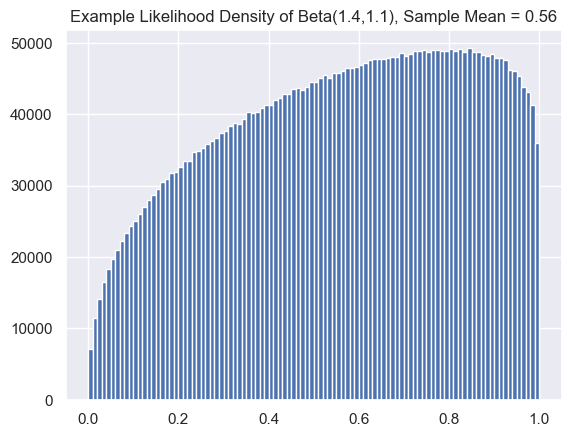

In [220]:
hyperprior_a = np.round(2.5*0.56,4)
hyperprior_b = np.round(2.5*0.44,4)
example_beta = rng.beta(a=hyperprior_a,b=hyperprior_b,size=4000000)
plt.hist(np.sort(example_beta),bins=100)
plt.title('Example Likelihood Density of Beta('+str(hyperprior_a)+','+str(hyperprior_b)+'), Sample Mean = ' + str(np.round(np.mean(example_beta),4)))

Now we need our observed games. We need both observed won and total games played from the Blue team. We know how many games each Region has won from both the Blue and Red sides, and therefore, we can calculate the total number of games. For example let's take EU. The number of games EU has played against USA is the number of games EU has won on Blue vs USA plus the number of games USA has won vs EU on Red. We can confirm if our code is correct by checking if the Regions Win probabilities sum to 1 against each other $(\text{p Region 1 win blue } = \text{ p Region 2 lose red}).$ Therefore:

In [221]:
data_blue_total = data_blue_wincount_pivot+data_red_wincount_pivot.T
data_red_total = data_red_wincount_pivot+data_blue_wincount_pivot.T
data_blue_wincount_pivot/data_blue_total

RED REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS
BLUE REGION,,,,,,,,,
CBL,NaN,0.000000,0.400000,0.333333,0.666667,1.000000,0.333333,0.428571,1.000000
LCK,1.000000,0.518519,0.916667,0.671233,1.000000,1.000000,0.584416,0.818182,1.000000
LCS,1.000000,0.228571,0.500000,0.551724,1.000000,1.000000,0.290323,0.680000,0.714286
LEC,1.000000,0.266667,0.742857,0.666667,0.500000,0.833333,0.450980,0.739130,0.533333
LJL,0.428571,0.000000,0.500000,0.000000,NaN,0.600000,0.000000,0.500000,0.400000
LLA,0.250000,0.000000,0.000000,0.000000,0.571429,0.166667,0.200000,0.666667,0.300000
LPL,1.000000,0.500000,0.681818,0.719298,0.833333,0.857143,0.583333,0.827586,1.000000
PCS,1.000000,0.333333,0.333333,0.360000,0.600000,0.750000,0.142857,0.500000,0.625000
VCS,0.000000,0.076923,0.166667,0.181818,1.000000,0.666667,0.285714,0.250000,NaN


In [222]:
data_red_wincount_pivot/data_red_total

BLUE REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS
RED REGION,,,,,,,,,
CBL,NaN,0.000000,0.000000,0.000000,0.571429,0.750000,0.000000,0.000000,1.000000
LCK,1.000000,0.481481,0.771429,0.733333,1.000000,1.000000,0.500000,0.666667,0.923077
LCS,0.600000,0.083333,0.500000,0.257143,0.500000,1.000000,0.318182,0.666667,0.833333
LEC,0.666667,0.328767,0.448276,0.333333,1.000000,1.000000,0.280702,0.640000,0.818182
LJL,0.333333,0.000000,0.000000,0.500000,NaN,0.428571,0.166667,0.400000,0.000000
LLA,0.000000,0.000000,0.000000,0.166667,0.400000,0.833333,0.142857,0.250000,0.333333
LPL,0.666667,0.415584,0.709677,0.549020,1.000000,0.800000,0.416667,0.857143,0.714286
PCS,0.571429,0.181818,0.320000,0.260870,0.500000,0.333333,0.172414,0.500000,0.750000
VCS,0.000000,0.000000,0.285714,0.466667,0.600000,0.700000,0.000000,0.375000,NaN


In [223]:
data_blue_wincount_pivot/data_blue_total + (data_red_wincount_pivot/data_red_total).T

RED REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS
BLUE REGION,,,,,,,,,
CBL,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LCK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LCS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LEC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LJL,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
LLA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LPL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PCS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
VCS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


Hence, for $w$ won games, and $n$ total games, we calculate our Posterior Distribution given by: $$\omega | \text{data} \sim \Beta(a+w,b+n-w),$$ which has an expected value $$E[\omega] = \frac{a+w}{a+b+n}.$$ As we can see, the regions that have never played against themselves recieve the prior expected probability of 0.56 to win on Blue, and those with 100% win-rate historically have varyingly high probabilities of winning depending on the strength of the data we have observed. Below is the Posterior Probability table of the Blue Side win chance acrross each Region pair.


Text(0.5, 0.98, 'Posterior Probability of Victory for the Blue Region, \n LCK and LPL dominance on Display.')

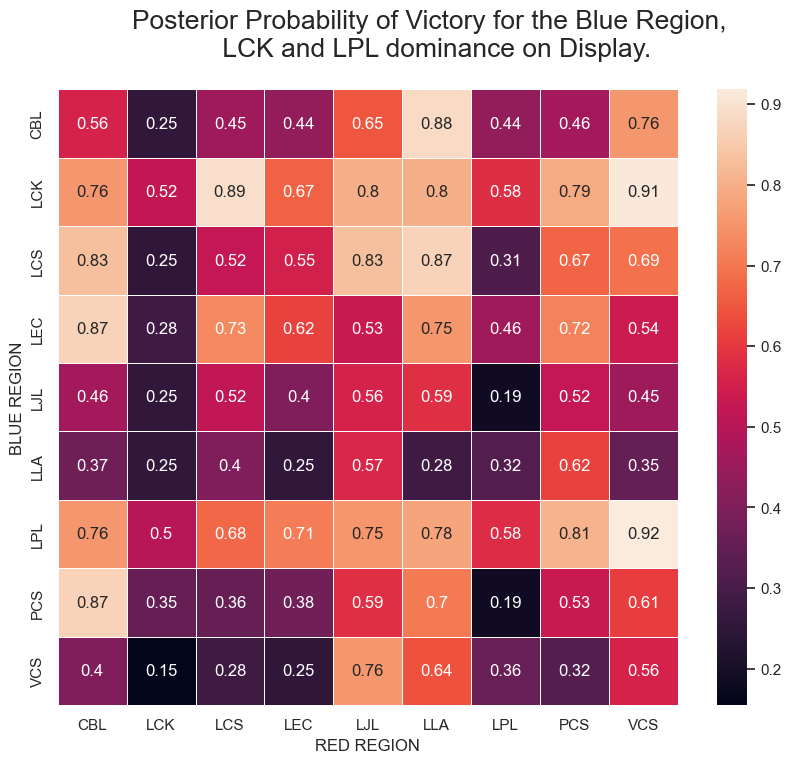

In [224]:
data_posterior_blue_win = (hyperprior_a + data_blue_wincount_pivot) / (hyperprior_a + hyperprior_b + data_blue_total)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_posterior_blue_win,annot=True,linewidths=0.5)
fig.suptitle("Posterior Probability of Victory for the Blue Region, \n LCK and LPL dominance on Display.",size=19)
#data_posterior_blue_win

## Prefered Side = Calculate the Best side for each Region.

Now we have each teams Posterior Win-Rate on Blue, we can work out what side they should choose if given the choice. Simply their blue win odds vs 1 - their opponents blue lose odds. NOTE that the Axis have swapped here and since I will only be using this for numbers in the sim there isn't much need to swap them back.

In [225]:
data_posterior_choose_blue = (data_posterior_blue_win>1-data_posterior_blue_win.T)*1
data_posterior_choose_blue

RED REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS
BLUE REGION,,,,,,,,,
CBL,1,1,1,1,1,1,1,1,1
LCK,1,1,1,0,1,1,1,1,1
LCS,1,1,1,1,1,1,0,1,0
LEC,1,0,1,1,0,1,1,1,0
LJL,1,1,1,0,1,1,0,1,1
LLA,1,1,1,1,1,0,1,1,0
LPL,1,1,0,1,0,1,1,0,1
PCS,1,1,1,1,1,1,0,1,0
VCS,1,1,0,0,1,0,1,0,1


# Simulation Construction
Now while we have our estimated chance of a Region winning in a single game vs any other Region, that is not all that matters. Multiple best of 5 matches must be won in order to win a Worlds Championship. Our Simulation must consist of:

1) Build Match and Sample function - Winner of Match and Side Selection
2) Work out how to remove teams
3) Construct the tournament bracket


## Team Set-Up
We need some data structure for each team. We need to carry the name of the team and the Region it represents. Further, we need some kind match data structure to track scores, side selection and overall results. We're going to use Named Tuples to store each team, and match results. In the future, as we know who is competing at Worlds 2023 (as of Sep 11th 2023 we know all but the LCS/LEC Grudge Match), we can create all the teams that will make their apperiance later in the year for the simluation.

In [227]:
SetupTeam = namedtuple('Team', ['Region','Seed','Name'])
SetupGameResults = namedtuple('Game', ['Teams', 'Score', 'Winner', 'Loser'])

# All 23 Teams (LEC4 and LCS4 must play in a qualifying series):
# MAJOR:
# LCK
LCK1 = SetupTeam(Region='LCK',Seed=1,Name='Gen.G')
LCK2 = SetupTeam(Region='LCK',Seed=2,Name='T1')
LCK3 = SetupTeam(Region='LCK',Seed=3,Name='KT Rolster')
LCK4 = SetupTeam(Region='LCK',Seed=4,Name='Dplus KIA')

#LPL
LPL1 = SetupTeam(Region='LPL',Seed=1,Name='JDG')
LPL2 = SetupTeam(Region='LPL',Seed=2,Name='BiliBili')
LPL3 = SetupTeam(Region='LPL',Seed=3,Name='LNG')
LPL4 = SetupTeam(Region='LPL',Seed=4,Name='Weibo')

#EMEA
LEC1 = SetupTeam(Region='LEC',Seed=1,Name='G2')
LEC2 = SetupTeam(Region='LEC',Seed=2,Name='Fnatic')
LEC3 = SetupTeam(Region='LEC',Seed=3,Name='MAD Lions')

#USA
LCS1 = SetupTeam(Region='LCS',Seed=1,Name='NRG')
LCS2 = SetupTeam(Region='LCS',Seed=2,Name='Cloud9')
LCS3 = SetupTeam(Region='LCS',Seed=3,Name='Team Liquid')

# MINOR:

#WQS (Grudge Match):
LEC4 = SetupTeam(Region='LEC',Seed=4,Name='BDS')
LCS4 = SetupTeam(Region='LCS',Seed=4,Name='GG')

#PCS
PCS1 = SetupTeam(Region='PCS',Seed=1,Name='PSG Talon')
PCS2 = SetupTeam(Region='PCS',Seed=2,Name='CTBC Flying Oyster') #What a goated name on god

#VCS
VCS1 = SetupTeam(Region='VCS',Seed=1,Name='GAM')
VCS2 = SetupTeam(Region='VCS',Seed=2,Name='Team Whales')

#LJL
LJL1 = SetupTeam(Region='LJL',Seed=1,Name='DetonatioN FocusMe')
#CBLOL
CBL1 = SetupTeam(Region='CBL',Seed=1,Name='LOUD')
#LLA
LLA1 = SetupTeam(Region='LLA',Seed=1,Name='Movistar R7')

## Single Game, Bo1, Side Selection and Bo5 Functions

In [174]:
# REFERENCE LOOKS LIKE ---> data_posterior_blue_win[RED REGION][BLUE REGION]
def PlayGame(BlueTeam,RedTeam,Score,prnt=0):
    if rng.uniform() < data_posterior_blue_win[RedTeam.Region][BlueTeam.Region]:
        Score = Score + [1,0]
        winner = BlueTeam
        loser = RedTeam
    else:
        Score = Score + [0,1]
        winner = RedTeam
        loser = BlueTeam
    if prnt>0:
        print(str(BlueTeam.Name) + ' : ' + str(score[0]) + '   |   ' + str(RedTeam.Name) + ' : ' + str(score[1]))
    return (Score,winner,loser)


def Bo1(Team1,Team2,prnt=0,BlueTeam1=1):
    if BlueTeam1 == 1:
        BlueTeam = Team1
        RedTeam = Team2
    else:
        BlueTeam = Team2
        RedTeam = Team1 
    score,winner,loser = PlayGame(BlueTeam,RedTeam,prnt)
    return SetupGameResults(Teams=[BlueTeam,RedTeam],Score=score,Winner=winner,Loser=loser)

def sideselection(TeamChoosing,Opponent,prnt=0):            
    if rng.uniform()<ChooseBlue[TeamChoosing.Region][Opponent.Region]:
        BlueChoice = TeamChoosing
        RedChoice = Opponent
        side = 'blue'
    else:
        BlueChoice = Opponent
        RedChoice = TeamChoosing
        side = 'red'
    if prnt>0:
        print(str(TeamChoosing.Name)+' has chosen '+side)
    return (BlueChoice,RedChoice)



def Bo5(Team1,Team2,prnt=0,BlueStartTeam1=1):
    MatchScores = {Team1.Name : 0,
                   Team2.Name : 0
    }
    if prnt>0:
        print('Bo5 --  ' + str(Team1.Name) + ' : ' + str(MatchScores[Team1.Name]) + '   |   ' + str(Team2.Name) + ' : ' + str(MatchScores[Team2.Name]))

    if BlueStartTeam1 == 1:
        BlueTeam = Team1
        RedTeam = Team2
    else:
        BlueTeam = Team2
        RedTeam = Team1 
        
    while (MatchScores[Team1.Name]<3) and (MatchScores[Team2.Name]<3):
        # Play Game
        score,winner,loser = PlayGame(BlueTeam,RedTeam,prnt)
        MatchScores[winner.Name] = 1 + MatchScores[winner.Name]
        # loser side selects
        BlueTeam,RedTeam = sideselection(loser,winner,prnt)
        if prnt>0:
            print('Score -- ' + str(Team1.Name) + ' : ' + str(MatchScores[Team1.Name]) + '   |   ' + str(Team2.Name) + ' : ' + str(MatchScores[Team2.Name]))
    
    return SetupGameResults(Teams=[BlueTeam,RedTeam],Score=[MatchScores[Team1.Name], MatchScores[Team2.Name]],Winner=winner,Loser=loser)

In [175]:
Bo1(VCS1,LLA,1,0)

Movistar R7 : 1   |   GAM Esports : 0


Game(Teams=[Team(Region='LLA', Name='Movistar R7'), Team(Region='VCS', Name='GAM Esports')], Score=[1, 0], Winner=Team(Region='LLA', Name='Movistar R7'), Loser=Team(Region='VCS', Name='GAM Esports'))

### The 8 Seeds Starting in the Play In Stage:
*The top 2 teams from VCS, PCS \
*The top team from LLA, CBLOL, LJL, and the winner of the WQS 

### The 14 Seeds Starting in the Swiss Stage:
*The top 4 teams from LPL, LCK \
*The top 3 teams from LEC, LCS

### Bo5 For WQS

### Play-in

In [126]:
# Play-in Teams
VCS1 = SetupTeam(Region='VCS',Seed=1,Name='GAM Esports')
VCS2 = SetupTeam(Region='VCS',Seed=2,Name='Flash Wolves')
PCS1 = SetupTeam(Region='PCS',Seed=1,Name='PSG Talon')
PCS2 = SetupTeam(Region='PCS',Seed=2,Name='MegaBank Beyond Gaming')
LLA = SetupTeam('LLA',1,'Movistar R7')
CBLOL = SetupTeam('CBLOL',1,'LOUD')
LJL = SetupTeam('LJL',1,'DetenatioN FocusMe')
LCS4 = SetupTeam('LCS',4,'100 Thieves')
LEC4 = SetupTeam('LEC',4,'Excel')

WQS = Bo5(LCS4,LEC4,0,rng.uniform()<0.5).Winner

WQS

Team(Region='LCS', Seed=4, Name='100 Thieves')